In [1]:
import pandas as pd
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
import random
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
def load_data(filename: str) -> pd.DataFrame:
    Column_Names=["sepal length","sepal width","petal length","petal width","class"]
    try:
        df = pd.read_csv(filename,header=None,names=Column_Names)
        df.columns=Column_Names
    except FileNotFoundError:
        print(f"File not found: {filename}. Please provide a valid path.")
    return df
file_path = "/content/drive/MyDrive/Machine_learning/Logistic_Regression/iris.csv"
df=load_data(file_path)
df.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Question 2.  

Create a new column for the dataset called target. The value of target will be 1 if the row contains a setosa flower, else the value is 0. There should be rows with the value of 1, the rest should be 0.

In [3]:
df['target'] = (df['class'] == 'Iris-setosa').astype(int)
df.info()
count_1 = (df['target'] == 1).sum()
count_0 = (df['target'] == 0).sum()
# Display the counts
print(f"Count of 1s: {count_1}")
print(f"Count of 0s: {count_0}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
 5   target        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Count of 1s: 50
Count of 0s: 100


#Question 3

For this question we want to take this dataset of 150 rows, and split it into a train, test, and validation dataset, using the following proportions for each split:

Training: 70%

Validation: 10%

Testing: 20%

Sample data for each subset using stratified sampling. I.e. the training data should have roughlypositive samples, the testing and validation dataset should also have roughly positive samples.

In [4]:

# Step 1: Identify Positive Samples
positive_samples = df[df['target'] == 1]
negative_samples=  df[df["target"] == 0]
# Step 2: Stratified Sampling
# def Stratified_Sampling(X1,X2, )
P1=positive_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.7))
N1=negative_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac= 0.7))
Train = pd.concat([P1, N1]).reset_index(drop=True)
Val =pd.concat([positive_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.1)),
                negative_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac= 0.1))]).reset_index(drop=True)
Test=pd.concat([positive_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.2)),
                negative_samples.groupby("target", group_keys=False).apply(lambda x: x.sample(frac= 0.2))]).reset_index(drop=True)

# Shuffle the each subset of data
Train = Train.sample(frac=1, random_state=42).reset_index(drop=True)
Val = Val.sample(frac=1, random_state=42).reset_index(drop=True)
Test = Test.sample(frac=1, random_state=42).reset_index(drop=True)

# Shape of each subset
print(f'Training Dataset: {Train.shape}')
print(f'Testing Dataset: {Test.shape}')
print(f'Validation Dataset: {Val.shape}')


Training Dataset: (105, 6)
Testing Dataset: (30, 6)
Validation Dataset: (15, 6)


#Question 4

Select two columns from the Iris dataset (i.e. petal length and petal width), and using these two columns, train a logistic regressor using gradient descent, measuring the gradient using finite differences approximation.

In [5]:
def bce(y, yhat):

    ''' Loss Function BCE. Inputs: reference, estimated.'''

    # TODO: apply the binary cross entropy function returning the loss

    loss = np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat)) #  we take mean at the end of every epoch

    return loss

class LogisticRegressor:

    ''' Logistic Regressor Model Default features value: 2.

        It calculates and prints epoch, train loss and validation loss.'''

    def __init__(self, n_features: int = 2):
        self.params = np.random.randn(n_features + 1)

    def logistic(self, x):

        ''' Applies sigmoid function to input x and returns the result.'''

        # TODO: apply the logistic function

        log_func = 1 / (1 + np.exp(-x))

        return log_func

    def __call__(self, x, logits=False):

        ''' It returns estimated value by calling self(inputs).'''

        y = self.params[0] + self.params[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y

    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 100, lr: float = 0.01):

        ''' .fit() computes our algorithm and calibrates the parameters to its best values.'''

        # TODO: train the model using gradient descent and finite-differences

        Train_loss_epoch = []
        valid_loss_epoch = []

        for epoch in range(1, epochs+1):
            Train_loss = []
            for xi, yi in zip(train_x, train_y):
                # calculate loss and update model parameters using gradient descent

                yhat = self(xi)
                gradient = (yhat - yi) * np.concatenate(([1], xi))      # Calculating gradient for all parameters.
                self.params -= lr * gradient                            # Updating parameters using gradient calculated in previous step.
                Train_loss.append(bce(yi, yhat))

            valid_loss = []
            for xi, yi in zip(valid_x, valid_y):
                # calculate validation loss (BUT DON'T UPDATE MODEL PARAMETERS!)

                yhat = self(xi)
                valid_loss.append(bce(yi, yhat))

            Train_loss_all = np.mean(Train_loss)
            valid_loss_all = np.mean(valid_loss)

            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss_all:.4f}, Train Loss: {Train_loss_all:.4f}")

            Train_loss_epoch.append(Train_loss_all)
            valid_loss_epoch.append(valid_loss_all)

        return Train_loss_epoch, valid_loss_epoch

    def predict(self, x, logits):

        ''' This is just used to call the __call__ function to compute and return the estimated value given an input.
            This is implemented to easily call the __call__ function from outside the class.'''

        return self(x, logits=logits)

#Question 5

As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

Epoch 1/100, Validation Loss: 0.3702, Train Loss: 0.5605
Epoch 2/100, Validation Loss: 0.3493, Train Loss: 0.3825
Epoch 3/100, Validation Loss: 0.3292, Train Loss: 0.3620
Epoch 4/100, Validation Loss: 0.3104, Train Loss: 0.3430
Epoch 5/100, Validation Loss: 0.2930, Train Loss: 0.3255
Epoch 6/100, Validation Loss: 0.2771, Train Loss: 0.3094
Epoch 7/100, Validation Loss: 0.2624, Train Loss: 0.2945
Epoch 8/100, Validation Loss: 0.2489, Train Loss: 0.2808
Epoch 9/100, Validation Loss: 0.2364, Train Loss: 0.2681
Epoch 10/100, Validation Loss: 0.2249, Train Loss: 0.2564
Epoch 11/100, Validation Loss: 0.2142, Train Loss: 0.2455
Epoch 12/100, Validation Loss: 0.2044, Train Loss: 0.2354
Epoch 13/100, Validation Loss: 0.1953, Train Loss: 0.2261
Epoch 14/100, Validation Loss: 0.1868, Train Loss: 0.2173
Epoch 15/100, Validation Loss: 0.1789, Train Loss: 0.2092
Epoch 16/100, Validation Loss: 0.1716, Train Loss: 0.2016
Epoch 17/100, Validation Loss: 0.1648, Train Loss: 0.1945
Epoch 18/100, Validatio

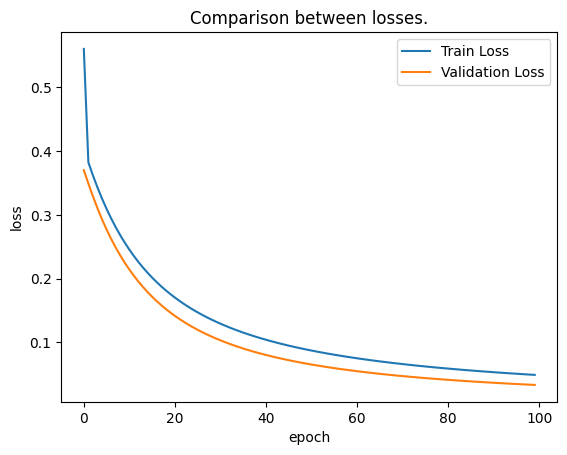

In [6]:
# Define train_x, train_y, valid_x, valid_y using your data
Train_x = Train[['petal length', 'petal width']].values
Train_y = Train['target'].values  # Corrected this line
Val_x = Val[['petal length', 'petal width']].values
Val_y = Val['target'].values

Model_1= LogisticRegressor()
Train_loss, Val_loss = Model_1.fit(Train_x, Train_y, Val_x, Val_y, epochs=100)  # "petal length" and "petal width" as input features

# Plotting comparison between Train loss and Valid loss every epoch.
plt.figure()
plt.plot(Train_loss, label='Train Loss')
plt.plot(Val_loss, label='Validation Loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Comparison between losses.")
plt.legend()


# Overfitting?
Interpretation of Curve Shapes:

Training Loss:

Training loss is decreasing steadily, it indicates that the model is learning from the data. As it does not increase or changes after some epoch which means it is well geranlised to the training data

Validation Loss:

Validation loss is decreasing and follows the training loss closely, it suggests that the model is generalizing well to new data.
If the validation loss starts to increase while the training loss is still decreasing or stable, it's a sign of overfitting. But in our model we donot see these kind of usuals. So, we can say our model does not overfits ,it well generalizes the data

#Question 6

In [8]:
Test_x = Test[['petal length', 'petal width']].values
Test_y = Test['target'].values

# Get the predicted probabilities
model_pred = Model_1.predict(Test_x, logits=False)

# Threshold the predicted probabilities to get predicted class labels
predicted_labels = (model_pred >= 0.5).astype(int)

# Calculate TP, TN, FP, FN
TP = np.sum((Test_y == 1) & (predicted_labels == 1)) # # True Positive
TN = np.sum((Test_y == 0) & (predicted_labels == 0)) # # True Negative
FP = np.sum((Test_y == 0) & (predicted_labels == 1)) # # False Positive
FN = np.sum((Test_y == 1) & (predicted_labels == 0)) # # False Positive

print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 10
True Negatives (TN): 20
False Positives (FP): 0
False Negatives (FN): 0


# Question 7

In [9]:
def precision(y, yhat):
    # calculate the precision and return it

    return np.sum((yhat == 1) & (y == 1))/(np.sum((yhat == 1) & (y == 1)) + np.sum((yhat == 1) & (y == 0)))

def recall(y, yhat):
    # calculate the recall and return it

    return np.sum((yhat == 1) & (y == 1))/(np.sum((yhat == 1) & (y == 1)) + np.sum((yhat == 0) & (y == 1)))

def f_beta(y, yhat, beta=1):
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    # calculate the f_beta score and return it

    return (1+(beta**2))*(pr*rc)/(((beta**2)*pr)+rc)


pr = precision(Test_y, predicted_labels)
rc = recall(Test_y, predicted_labels)
f1 = f_beta(Test_y, predicted_labels)

print(f'Precision: {pr:.2f}')
print(f'Recall: {rc:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# Question  8

In [10]:
def report_classifier(TP,FP,FN,TN,pr,rc,f1):

    ''' Prints whole report for the model results.'''

    print("|        |          | Predicted |          |")
    print("|        |          |  Positive | Negative |")
    print(f"| Actual | Positive | {TP:>9} | {FP:>8} |")
    print(f"|        | Negative | {FN:>9} | {TN:>8} |")
    print(f"\n- Precision: {pr:.2f}")
    print(f"- Recall: {rc:.2f}")
    print(f"- F1 Score: {f1:.2f}")

report_classifier(TP,FP,FN,TN,pr,rc,f1)

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |        10 |        0 |
|        | Negative |         0 |       20 |

- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00


# Question 9

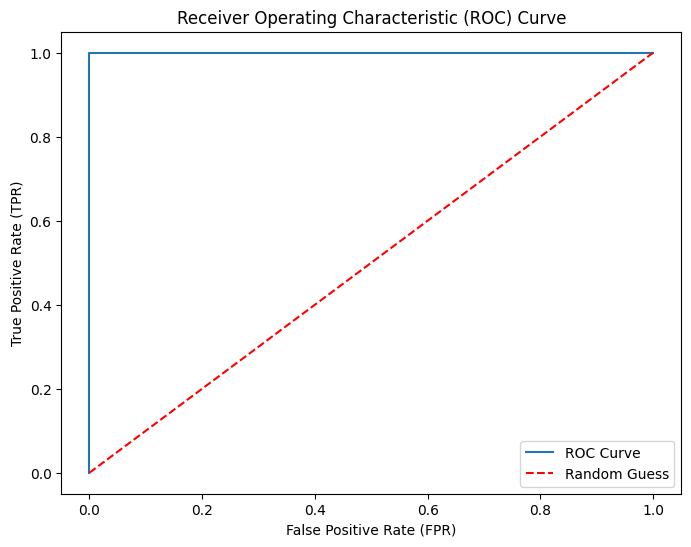

In [11]:
def roc(y, yhat, threshold_step=0.01):
    # iteratively increase the threshold by threshold_step,
    # calculating the TP and FP rate for each iteration. This function
    # should return two lists, a list of TP rates, and a list of FP
    # rates.

    thresholds = np.arange(0, 1.01, threshold_step)     # array containing value from 0 to 1 with 0.01 step.

    total_y_1 = np.sum(y == 1)
    total_y_0 = np.sum(y == 0)

    TP_rate_list = []
    FP_rate_list = []

    for threshold in thresholds:
      y_pred = (yhat >= threshold).astype(int)          # Increasing threshold with every loop

      TP = np.sum((y_pred == 1) & (y == 1))
      FP = np.sum((y_pred == 1) & (y == 0))

      TPR = TP / total_y_1
      FPR = FP / total_y_0

      TP_rate_list.append(TPR)
      FP_rate_list.append(FPR)

    return TP_rate_list, FP_rate_list

tp_rates, fp_rates = roc(Test_y, model_pred)

# visualise the ROC curve here

plt.figure(figsize=(8, 6))
plt.plot(fp_rates, tp_rates, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Question 10

In [12]:
New_Train_x = Train[['petal length', 'sepal width']].values
New_Train_y = Train['target'].values  # Corrected this line
New_Val_x = Val[['petal length', 'sepal width']].values
New_Val_y = Val['target'].values

In [13]:
Model_2 = LogisticRegressor()
New_Train_loss, New_Val_loss = Model_2.fit(New_Train_x, New_Train_y, New_Val_x, New_Val_y, epochs=100)       # "petal length" and "sepal width" as input features

Epoch 1/100, Validation Loss: 0.2498, Train Loss: 0.3400
Epoch 2/100, Validation Loss: 0.1773, Train Loss: 0.2373
Epoch 3/100, Validation Loss: 0.1348, Train Loss: 0.1818
Epoch 4/100, Validation Loss: 0.1076, Train Loss: 0.1470
Epoch 5/100, Validation Loss: 0.0890, Train Loss: 0.1234
Epoch 6/100, Validation Loss: 0.0756, Train Loss: 0.1065
Epoch 7/100, Validation Loss: 0.0655, Train Loss: 0.0937
Epoch 8/100, Validation Loss: 0.0576, Train Loss: 0.0837
Epoch 9/100, Validation Loss: 0.0514, Train Loss: 0.0757
Epoch 10/100, Validation Loss: 0.0463, Train Loss: 0.0692
Epoch 11/100, Validation Loss: 0.0421, Train Loss: 0.0637
Epoch 12/100, Validation Loss: 0.0385, Train Loss: 0.0591
Epoch 13/100, Validation Loss: 0.0355, Train Loss: 0.0552
Epoch 14/100, Validation Loss: 0.0329, Train Loss: 0.0517
Epoch 15/100, Validation Loss: 0.0306, Train Loss: 0.0487
Epoch 16/100, Validation Loss: 0.0286, Train Loss: 0.0460
Epoch 17/100, Validation Loss: 0.0269, Train Loss: 0.0436
Epoch 18/100, Validatio

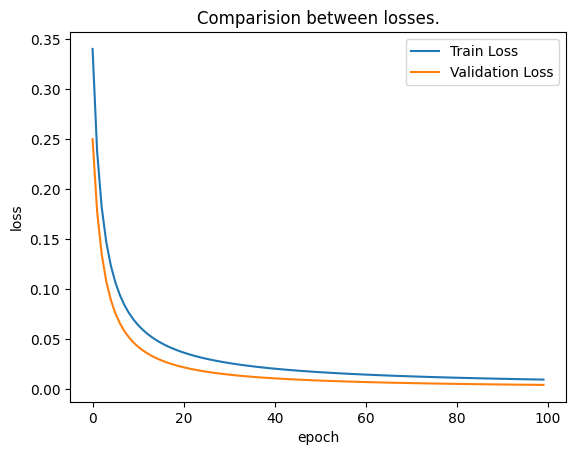

In [14]:
# Plotting comparison between Train loss and Valid loss every epoch.

plt.figure()
plt.plot(New_Train_loss, label = 'Train Loss')
plt.plot(New_Val_loss, label = 'Validation Loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Comparision between losses.")
plt.legend()

In [15]:
New_Test_x = Test[['petal length', 'sepal width']].values
New_Test_y = Test['target'].values
# Get the predicted probabilities
Model_pred= Model_2.predict(New_Test_x, logits=False)

# Threshold the predicted probabilities to get predicted class labels
predicted_labels = (Model_pred >= 0.5).astype(int)

# Calculate TP, TN, FP, FN
TP_New = np.sum((New_Test_y == 1) & (predicted_labels == 1)) # # True Positive
TN_New = np.sum((New_Test_y == 0) & (predicted_labels == 0)) # # True Negative
FP_New = np.sum((New_Test_y == 0) & (predicted_labels == 1)) # # False Positive
FN_New = np.sum((New_Test_y == 1) & (predicted_labels == 0)) # # False Positive

print(f'True Positives (TP): {TP_New}')
print(f'True Negatives (TN): {TN_New}')
print(f'False Positives (FP): {FP_New}')
print(f'False Negatives (FN): {FN_New}')

True Positives (TP): 10
True Negatives (TN): 20
False Positives (FP): 0
False Negatives (FN): 0


In [16]:
pr_New = precision(New_Test_y, predicted_labels)
rc_New = recall(New_Test_y, predicted_labels)
f1_New = f_beta(New_Test_y, predicted_labels)

report_classifier(TP_New,FP_New,FN_New,TN_New,pr_New,rc_New,f1_New)

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |        10 |        0 |
|        | Negative |         0 |       20 |

- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00


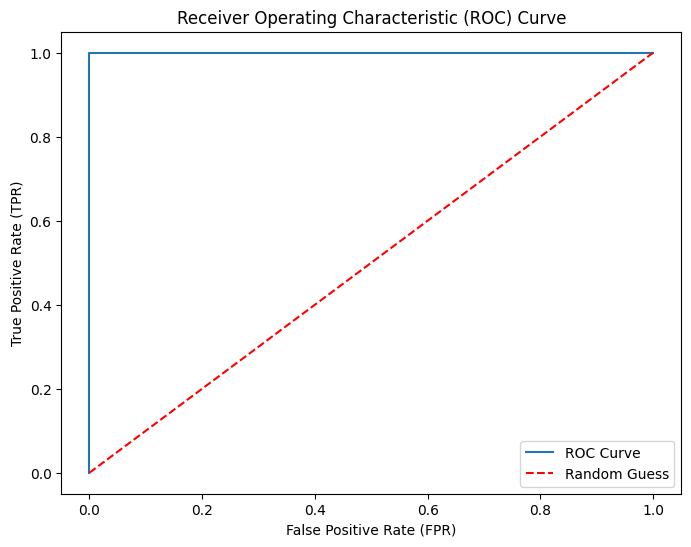

In [17]:
tp_rates, fp_rates = roc(New_Test_y, Model_pred)

# visualise the ROC curve here

plt.figure(figsize=(8, 6))
plt.plot(fp_rates, tp_rates, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Comparision between the Models.


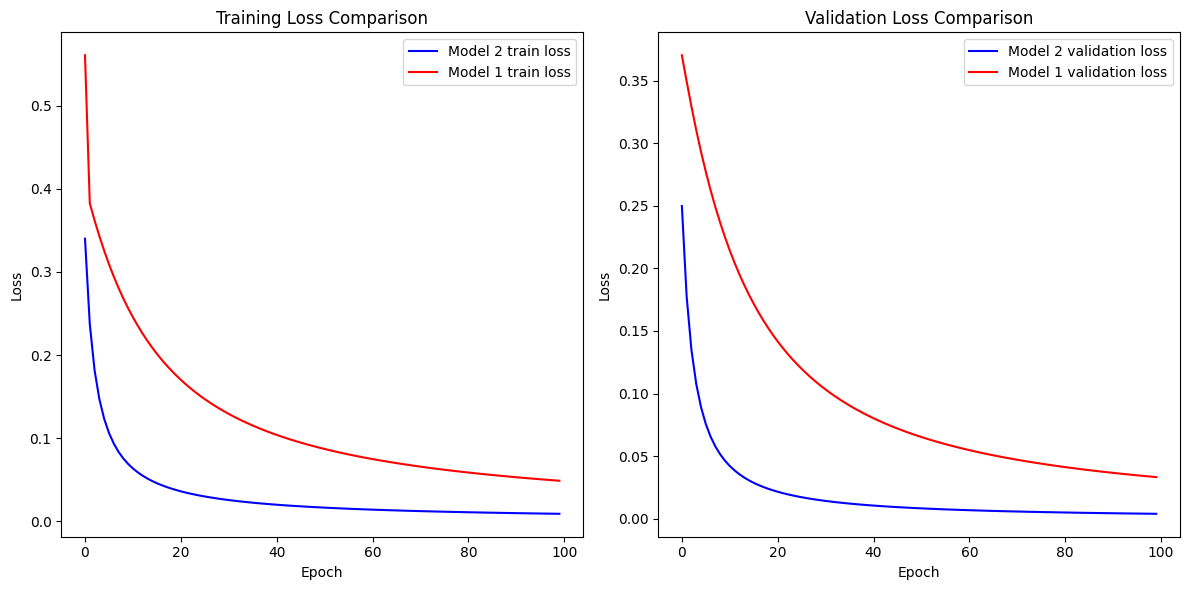

In [18]:
# Plot the Train loss Model_1 and Model_2
def compare_Model(Model_1,Model_2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(New_Train_loss,color='blue', label='Model 2 train loss')
    plt.plot(Train_loss, color='red', label='Model 1 train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()

    #Plot the validation loss Model_ 1 and Model_2
    plt.subplot(1, 2, 2)
    plt.plot(New_Val_loss, color='blue',label='Model 2 validation loss')
    plt.plot(Val_loss, color='red', label='Model 1 validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()
compare_Model(Model_1, Model_2)


In Model_1 we take input petal length and petal width

In Model_2 we take input petal length and sepal width


Both are equaly accurate with 100% accuracy

However,if we visualise it more precisly then we can come to conclusion that the Model_2 is better as it converges more quickly than Model_1.

Convergence may depend on cloumn selection may be for different column selction(like petal width and sepal length)  we can get less convergence than Model_1